In [83]:
import pandas as pd
import matplotlib as plt
import xlrd

telecom_path = 'Churn.xlsx'
telecom_df = pd.read_excel(telecom_path) #converting excel to panadas dataframe
telecom_df = telecom_df.dropna(how="all") # remove samples with all missing values
telecom_df = telecom_df.dropna(axis=0) # remove duplicates

telecom_df.head() #looking at data
telecom_df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0.0,No,No,66.0,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No



There are two types of features in the dataset: categorical(Two or more values) and numerical. I have combine the features into two lists so that we can analyze them jointly. they are given below


In [84]:
categorical_features = [
 'gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines',
 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
 'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod',
]
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
target = 'Churn'


In [85]:
telecom_df[numerical_features].describe() # numerical_features distribution

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:title={'center':'TotalCharges'}>, <AxesSubplot:>]],
      dtype=object)

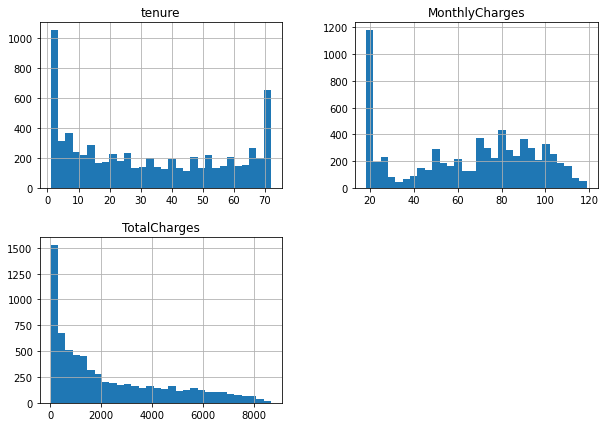

In [86]:
telecom_df[numerical_features].hist(bins=30, figsize=(10, 7)) #histograms for 'number of customers' vs 'numerical_features'


Distribution of numerical features in relation with target variable is given below:


array([<AxesSubplot:title={'center':'tenure'}>,
       <AxesSubplot:title={'center':'MonthlyCharges'}>,
       <AxesSubplot:title={'center':'TotalCharges'}>], dtype=object)

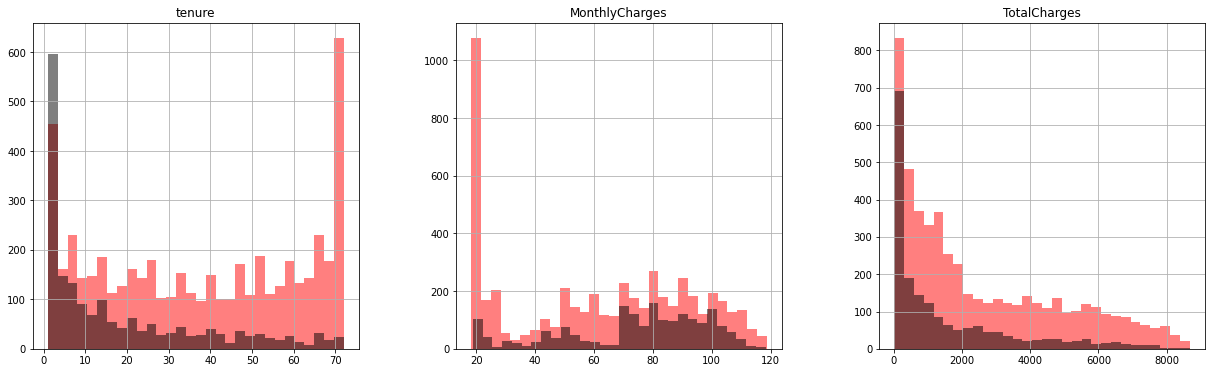

In [87]:
fig, ax = plt.pyplot.subplots(1, 3, figsize=(21, 6))
telecom_df[telecom_df.Churn == "No"][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)
telecom_df[telecom_df.Churn == "Yes"][numerical_features].hist(bins=30, color="black", alpha=0.5, ax=ax)

we can observe that the greater the totalcharges and tenure less is the probability of churn.


Categorical_feature distribution-
To analyze categorical features I have used bar charts they are given below:
    

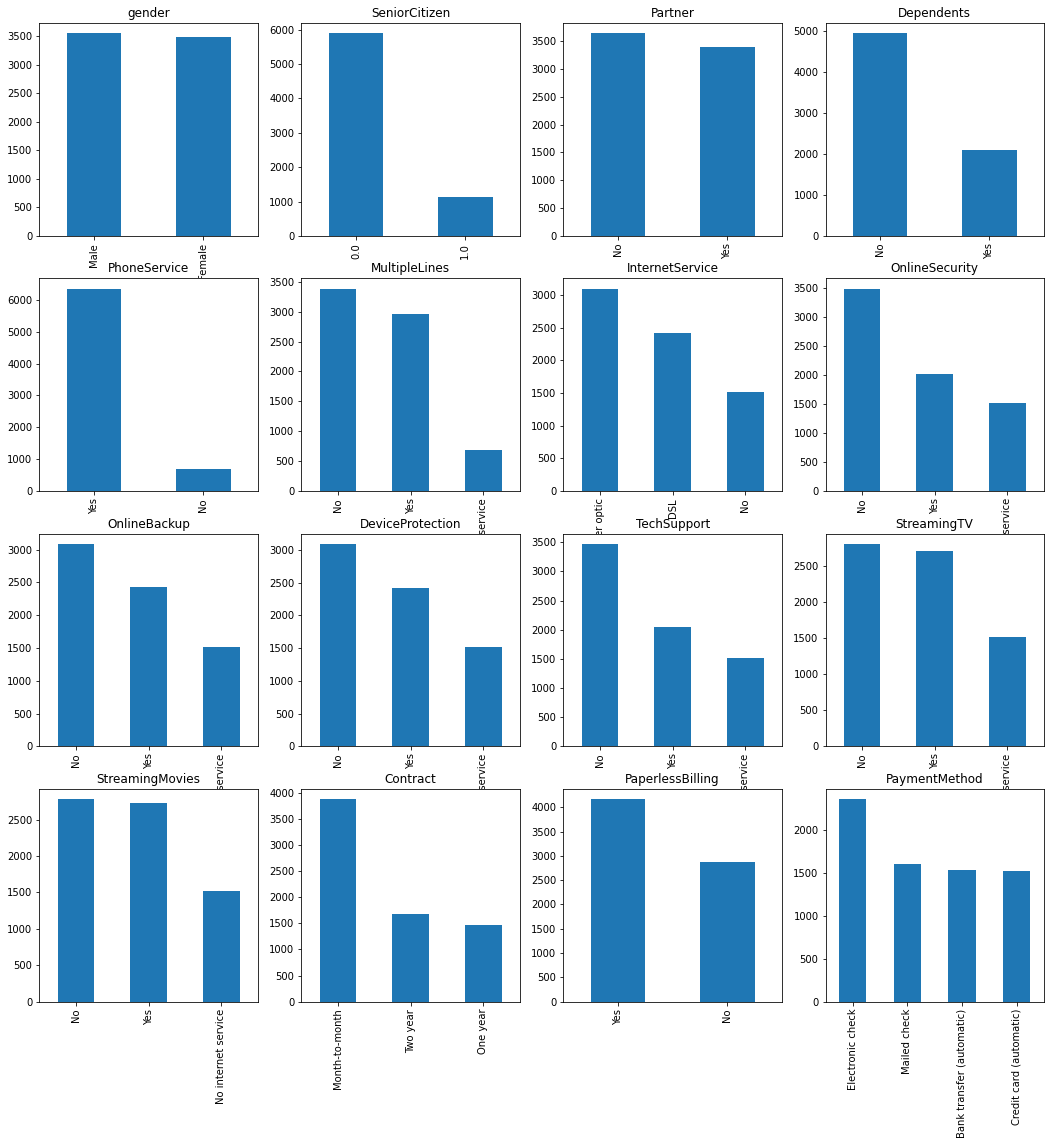

In [88]:
#Categorical_feature distribution

ROWS, COLS = 4,4
fig, ax = plt.pyplot.subplots(ROWS, COLS, figsize=(18, 18))
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    telecom_df[categorical_feature].value_counts().plot(kind='bar', ax=ax[row, col]).set_title(categorical_feature)


The next step is to look at categorical features with respect to target variable(Churn).
Below in three different cells i have shown relation for Contract, StreamingTV and InternetService features with target variable.


Text(0.5, 1.0, 'churned')

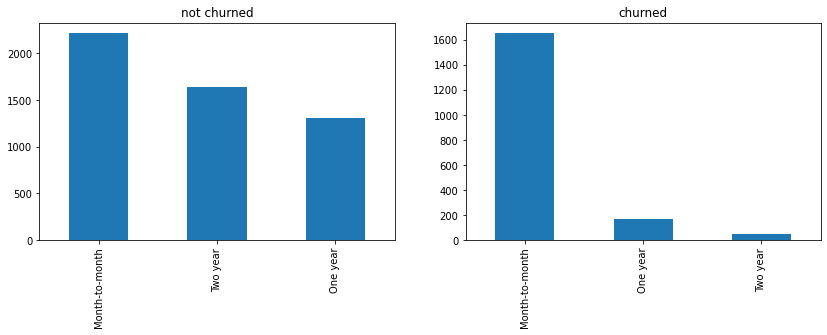

In [89]:
feature = 'Contract'
fig, ax = plt.pyplot.subplots(1, 2, figsize=(14, 4))
telecom_df[telecom_df.Churn == 'No'][feature].value_counts().plot(kind='bar', ax=ax[0]).set_title('not churned')
telecom_df[telecom_df.Churn == 'Yes'][feature].value_counts().plot(kind='bar', ax=ax[1]).set_title('churned')

Text(0.5, 1.0, 'churned')

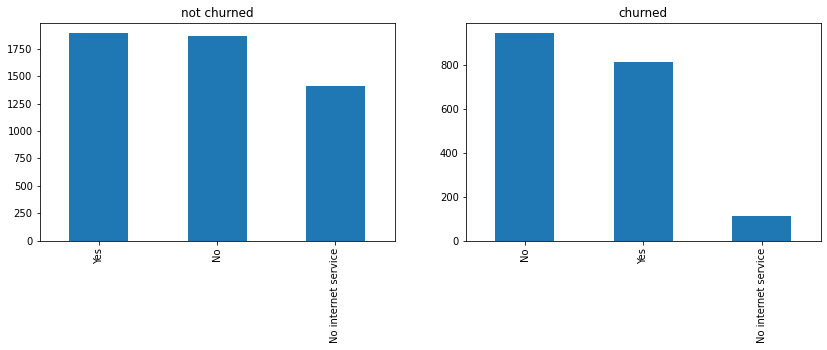

In [90]:
feature = 'StreamingTV'
fig, ax = plt.pyplot.subplots(1, 2, figsize=(14, 4))
telecom_df[telecom_df.Churn == 'No'][feature].value_counts().plot(kind='bar', ax=ax[0]).set_title('not churned')
telecom_df[telecom_df.Churn == 'Yes'][feature].value_counts().plot(kind='bar', ax=ax[1]).set_title('churned')

Text(0.5, 1.0, 'churned')

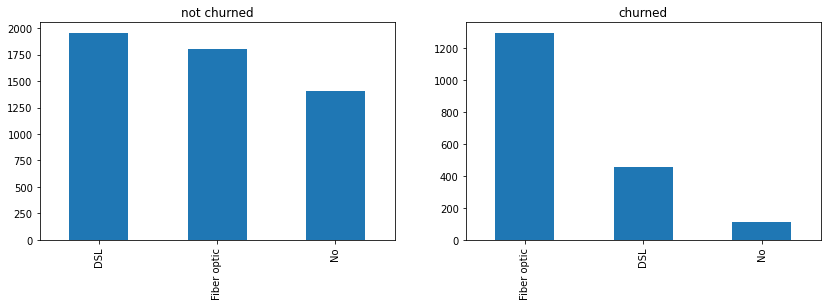

In [91]:
feature = 'InternetService'
fig, ax = plt.pyplot.subplots(1, 2, figsize=(14, 4))
telecom_df[telecom_df.Churn == 'No'][feature].value_counts().plot(kind='bar', ax=ax[0]).set_title('not churned')
telecom_df[telecom_df.Churn == 'Yes'][feature].value_counts().plot(kind='bar', ax=ax[1]).set_title('churned')


It is clear from above three charts that feature StreamingTV does not affect much the target variable. but Contract and InternetService affects the target variable significantly.
i.e. when Contract is low(month-to-month) churn value is high and viceversa.
similarly different internet services have significant difference in churn and not churn values.
I have tried above method for every categorical features and found that only 'Contract' and 'InternetService' features
affects target variable significantly.

Key factors or features that predict customer churn will be all numerical features( totalcharges, monthlycharges, tenure) and some categorical features( contract & internetservice).


Target variable distribution-

The model would acheive high accuracy as it would mostly predict majority class - users who did not churned in our example.


Text(0.5, 1.0, 'churned')

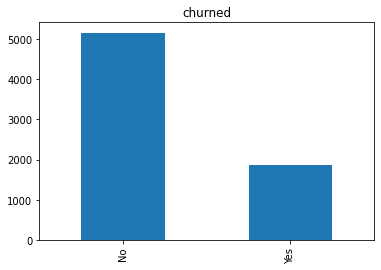

In [92]:
telecom_df[target].value_counts().plot(kind='bar').set_title('churned')

It shows that we are dealing with imbalanced problem as there are more non-churned than churned users.

In [93]:

telecom_df.fillna(method='bfill', axis=0).fillna(0) 
# filling the null values with values after it and replace all other values with 0

Cmap = {'Yes': 1, 'No': 0}
telecom_df['Churn'] = telecom_df['Churn'].map(Cmap)

y = telecom_df.Churn
X = telecom_df[numerical_features]  
# here I have use only numerical features because categorical featuers does not fit in my model due to their more than two values

from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)



Training the model by using Randomforest and testing the model by using mean absolute error:


In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

f_model = RandomForestRegressor(random_state=1)
f_model.fit(train_X, train_y)
melb_preds = f_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

0.28383993895649434


It is clear from the mean absolute error that model accuracy is more as said earlier at the time of target variable distribution.

Key factors or features that predict customer churns are given below:
1. Tenure
2. Monthlycharges
3. Totalcharges
4. Internetservice
5. Contract

If above actions would be implemented count for customers who not churned will be more than who churned. 
I can determine it with below bar graph:

Text(0.5, 1.0, 'churned')

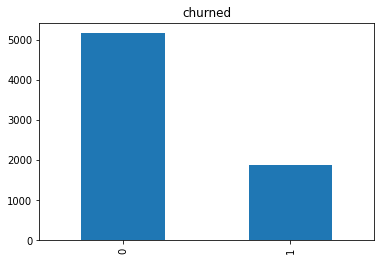

In [95]:
telecom_df[target].value_counts().plot(kind='bar').set_title('churned')
# 0 for not churned and 1 for churned